# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Proyecto 13: Pronosticos y predicciones

Empresa: Gimnasios Model Fitness

Objetivo: Elaborar una estrategia de retencion de clientes

In [2]:
#Importamos las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Librerias de sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#librerias de metricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics


In [3]:
# cargamos el dataframe
df_gym = pd.read_csv('https://raw.githubusercontent.com/LuisPeza/Proyecto_13/refs/heads/main/gym_churn_us.csv')

## Paso 1  Estudiamos los datos 

In [4]:
#Le damos un vistazo a las columnas y vemos si no tienen valores ausentes
df_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

- vemos que tenemos puros datos numericos no tenemos datos string, no contamos con valores nulos

In [5]:
#Le damos un vistazo a los datos 
print(df_gym.sample(5))

      gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
2877       1              0        1              0      1               12   
437        1              1        1              0      0                1   
2918       1              1        0              0      1                1   
1340       1              1        1              0      1               12   
1710       0              1        1              1      0                1   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
2877             0   33                     28.446849                   12.0   
437              1   28                    166.816290                    1.0   
2918             1   26                    156.554758                    1.0   
1340             1   34                     24.923561                    5.0   
1710             1   28                    127.391208                    1.0   

      Lifetime  Avg_class_frequency_total  A

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy bien trabajado este primer paso. Has explorado las columnas, confirmado la ausencia de valores nulos y verificado el tipo de datos de forma clara. Este inicio sólido aporta una buena base para avanzar con confianza en el análisis.  
</div>


## Paso 2. LLevar a cabo el analisis exploratorio de datos (EDA)

### 1.- Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe())

In [6]:
#Aplicamos en describe para conocer el resumen estadisdico de las variables
#Esto para ver la distribucion de los datos y saber si no tenemos valores atipicos.
print(df_gym.describe())

            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen uso de `describe()` para obtener una visión estadística completa del dataset. Has identificado correctamente la distribución, los rangos y los posibles valores atípicos, lo cual refuerza la calidad de tu análisis exploratorio.  
</div>


### 2.- Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [7]:
churned = df_gym.groupby('Churn').mean()
print(churned)

         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

- Se observa varios valores interesantes vemos que el promedio de edad de los que se van su edad es de 27 y los que se quedan el promedio es de 30

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente aplicación de `groupby()` para comparar los promedios entre clientes que se quedan y los que cancelan. La interpretación sobre la edad y otras diferencias clave aporta un gran valor al análisis exploratorio.  
</div>


### 3.- Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

In [8]:
#Hacemos un slice de los datos de la variable Churn para ver la distribucion de los que cancelan 
sequedan = df_gym[df_gym['Churn'] == 0]
nosequedan = df_gym[df_gym['Churn'] == 1]

Text(0.5, 1.0, 'Distribucion de la variable Churn')

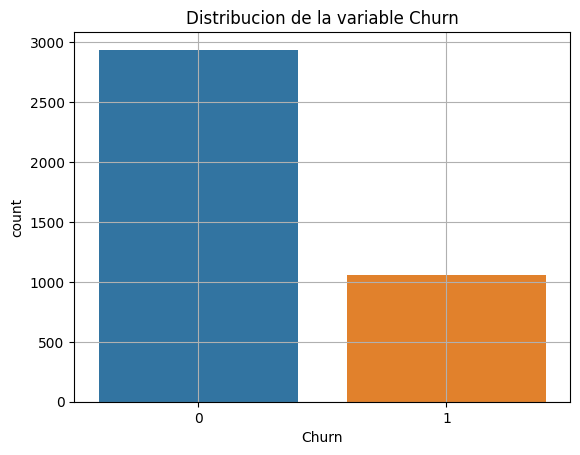

In [9]:
# Analizamos la distribucion de la variable churn
sns.countplot(x='Churn', data=df_gym)
plt.grid()
plt.title('Distribucion de la variable Churn')

- Vemos como se conforma la variable con los que cancelan en color anaranjado son arriba de 1000 y los que se quedan casi los 3000

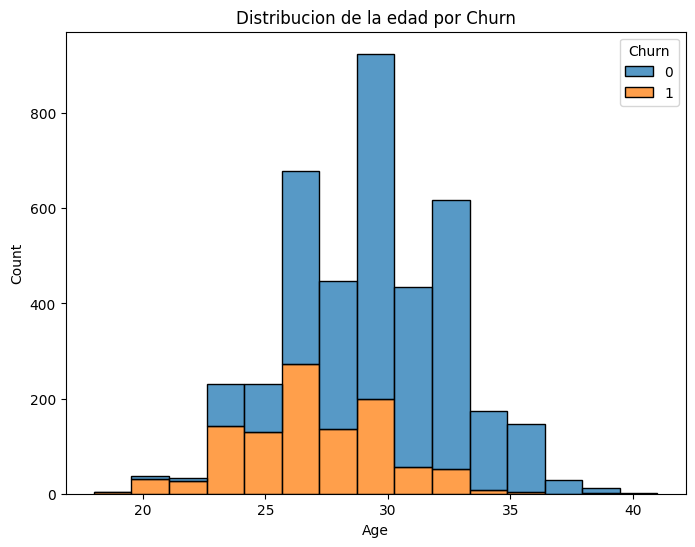

In [10]:


plt.figure(figsize=(8, 6))
sns.histplot(data=df_gym, x='Age', hue='Churn', bins=15, multiple='stack')
plt.title('Distribucion de la edad por Churn')
plt.show()



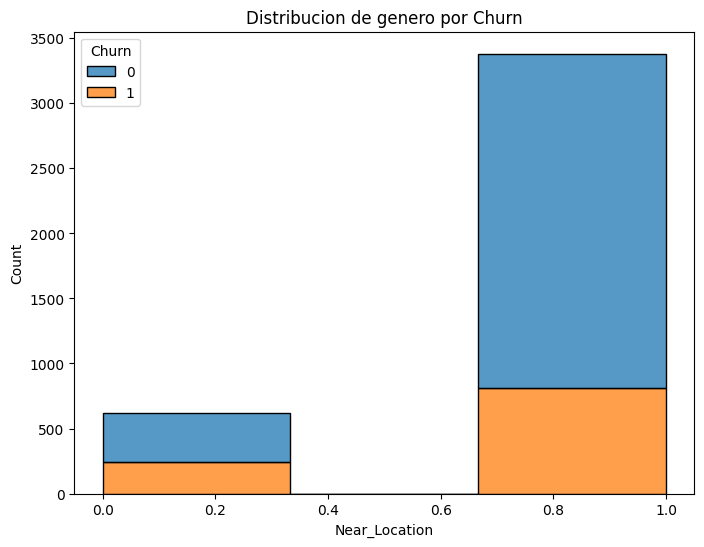

In [11]:
#Comparamos el genero de las personas que no cancelaron
plt.figure(figsize=(8, 6))
sns.histplot(data=df_gym, x='Near_Location', hue='Churn', bins=3, multiple='stack')
plt.title('Distribucion de genero por Churn')
plt.show()

- Ya viendo los histogramas se observa que con la variable edad los que mas cancelan tienen una edad aproximada de 27 y 28 años y los que mas se quedan son las personas de 30 años. Comparado con otra variable como si viven cerca de donde esta el gym la mayoria de usuarios si viven cerca de donde se encuentra el gym.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen trabajo al graficar la distribución de la variable objetivo y contrastarla con características clave como la edad y la cercanía al gimnasio. La interpretación que realizas aporta claridad y fortalece el análisis visual de los datos.  
</div>


### 4.- Crea una matriz de correlación y muéstrala.

In [12]:
matriz_correlacion = df_gym.corr()

Text(0.5, 1.0, 'Matriz de correlacion')

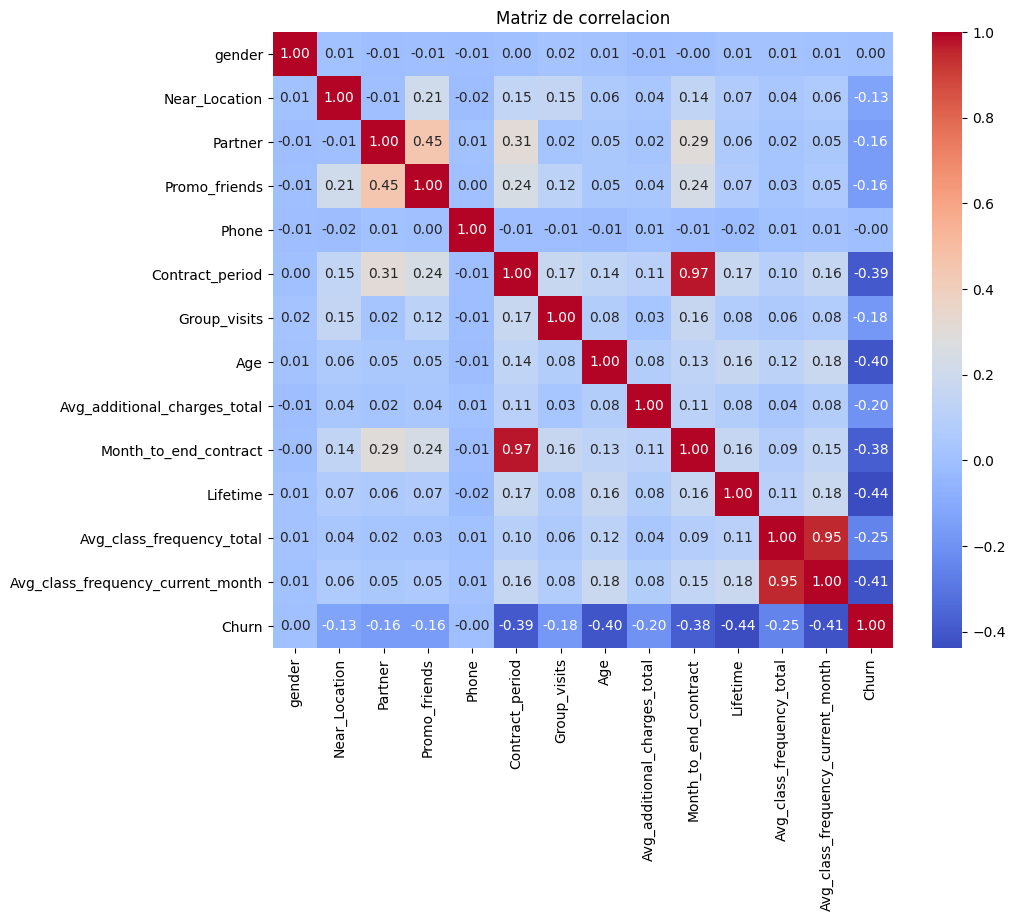

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de correlacion')

- Vemos correlacion del 0.97 entre las variables contract_period y month_to_end_contract, tambien existe correlacion entre parther y promo_friend con 0.45 al igual que partner y contract Perid con 0.31.  

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Bien realizada la construcción de la matriz de correlación y su visualización con el mapa de calor. La interpretación de las correlaciones más destacadas muestra una lectura atenta de las relaciones entre variables, lo cual enriquece el análisis.  
</div>


## Paso 3.  Construir un modelo para predecir la cancelación de usuarios

Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

### 1.- Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [14]:
#Divide los datos en conjuntos de entrenamiento y validacion
X = df_gym.drop('Churn', axis=1)
y = df_gym['Churn']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('Conjunto de training:',  X_train.shape, y_train.shape)
print('Conjunto de validación:',  X_test.shape, y_test.shape)

Conjunto de training: (2800, 13) (2800,)
Conjunto de validación: (1200, 13) (1200,)


#### Modelo Regresion logistica

In [16]:

#Definimos el modelo de Regresion Logistica
lr_model = LogisticRegression(solver='liblinear', random_state=123)
#Entrenamos el modelo
lr_model.fit(X_train,y_train)

#Predicciones
y_pred_log_reg = lr_model.predict(X_test)
#Crear una matriz de confusion
mat_conf = pd.crosstab(y_test,y_pred_log_reg)
mat_conf.index = ["cancelado","no cancelado"]
mat_conf.columns = ["cancelado","no cancelado"]
print( mat_conf)

              cancelado  no cancelado
cancelado           853            36
no cancelado         52           259


In [17]:
#Extraer las principales métricas 
print(metrics.classification_report(y_test,y_pred_log_reg, target_names=["cancelado","no cancelado"], digits=4))

              precision    recall  f1-score   support

   cancelado     0.9425    0.9595    0.9509       889
no cancelado     0.8780    0.8328    0.8548       311

    accuracy                         0.9267      1200
   macro avg     0.9103    0.8962    0.9029      1200
weighted avg     0.9258    0.9267    0.9260      1200



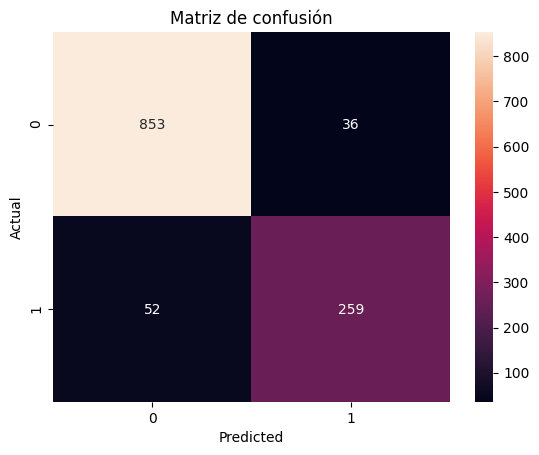

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='g')
plt.title('Matriz de confusión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Vemos que con el modelo de regresion logistica, tenemos el modelo con 93 % de aceptacion con un recall de .81 de que no cancelan y precision de .91. 

#### Modelo Bosque aleatorio

In [19]:
#Bosque Aleatorio
mod_bosale = RandomForestClassifier(n_estimators=100,max_depth=6,random_state=123)
mod_bosale.fit(X_train, y_train)
#Predicciones
y_pred_tree_r = mod_bosale.predict(X_test)
#Crear una matriz de confusion

mat_conf = pd.crosstab(y_test,y_pred_tree_r)

mat_conf.index = ["cancelado","no cancelado"]
mat_conf.columns = ["cancelado","no cancelado"]
print(mat_conf)

              cancelado  no cancelado
cancelado           844            45
no cancelado         72           239


In [20]:
#Extraer las principales métricas 
print(metrics.classification_report(y_test,y_pred_tree_r, target_names=["cancelado","no cancelado"], digits=4))

              precision    recall  f1-score   support

   cancelado     0.9214    0.9494    0.9352       889
no cancelado     0.8415    0.7685    0.8034       311

    accuracy                         0.9025      1200
   macro avg     0.8815    0.8589    0.8693      1200
weighted avg     0.9007    0.9025    0.9010      1200



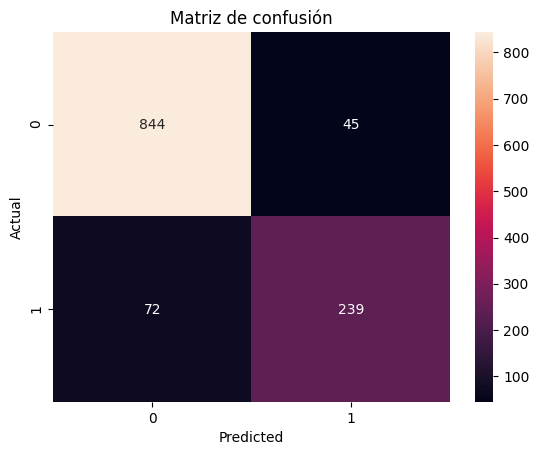

In [21]:
#creamos el grafico de matriz de confusion.

from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tree_r), annot=True, fmt='g')
plt.title('Matriz de confusión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


- Vemos que con el modelo de bosque aleatorio, tenemos el modelo con 90 % de aceptacion con un recall de .73 de que no cancelan y precision de .87. 

- De los dos modelos el que mejores resultados nos dio fue el de Regresion Logistica con 93% de aceptacion.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen desarrollo de los modelos de clasificación. Has implementado tanto regresión logística como bosque aleatorio, comparando sus métricas y seleccionando el mejor en función de los resultados. Esto refleja un enfoque sólido y analítico en la construcción y evaluación de modelos.  
</div>


## Paso 4. Crear clústeres de usuarios/as

Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

### 1.- Estandariza los datos

In [22]:
# la estandarización de datos obligatoria antes de pasarlo al algoritmo
from sklearn.cluster import KMeans
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### 2. Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

In [23]:


from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X_sc, method = 'ward')



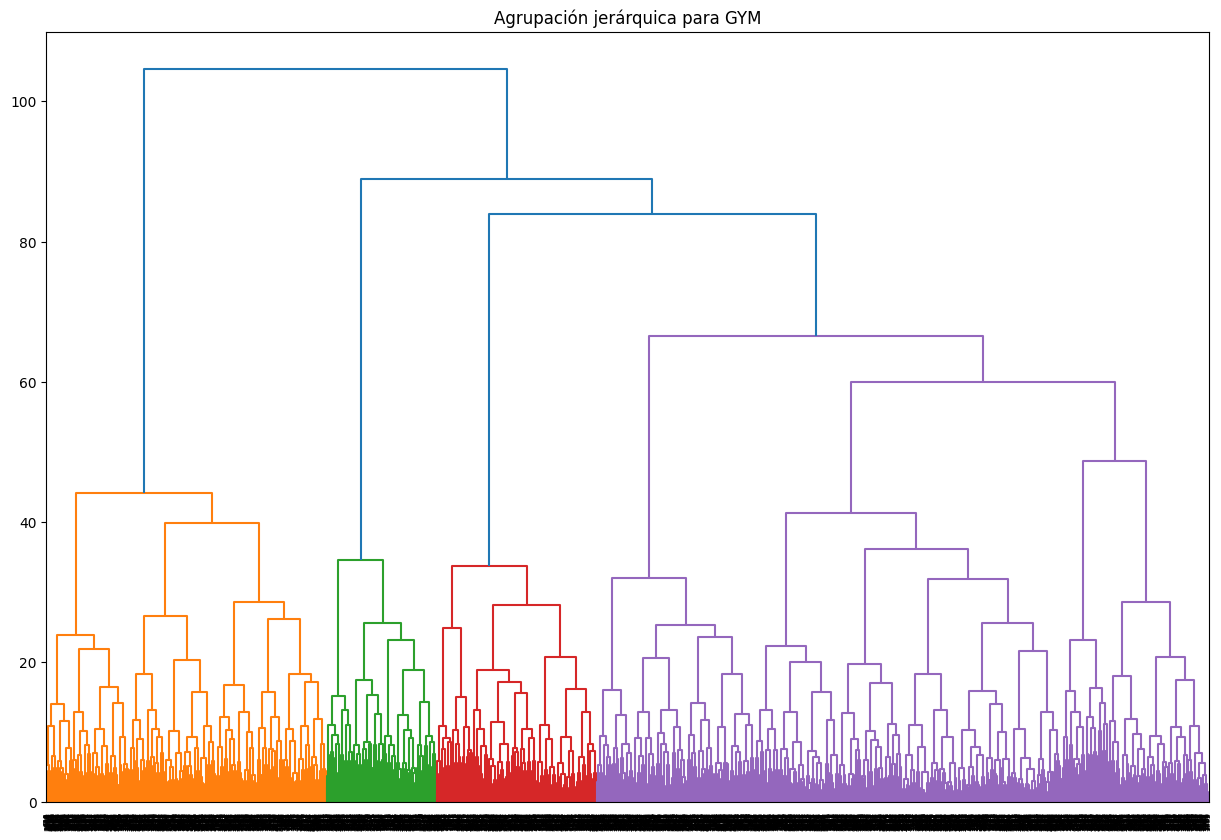

In [24]:


plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.show()



- Como vemos en el dendograma tenemos 4 colores diferentes para cada conjunto de endogramas entonces, basado en esto utilizaremos un cluster de 4

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente aplicación de la estandarización previa al clustering y uso del dendrograma para determinar el número de clústeres. La justificación visual de elegir 4 grupos está bien fundamentada y muestra un buen criterio analítico.  
</div>


### 3.- Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

In [25]:


# define el modelo k_means con 5 clústeres

km = KMeans(n_clusters = 5, random_state=123)
# predice los clústeres para las observaciones (el algoritmo les asigna un número de 0 a 4)
labels = km.fit_predict(X_sc)




In [26]:

# almacena etiquetas de clúster en el campo de nuestro conjunto de datos
df_gym['cluster_km'] =  labels


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy bien implementado el modelo de K-means con 5 clústeres y la asignación de etiquetas al dataset. Este paso enriquece el análisis, permitiendo explorar segmentos de clientes de forma más estructurada.  
</div>


### 4.- Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [27]:
# obtiene las estadísticas de los valores medios de las características por clúster
clusters_promedio = df_gym.groupby('cluster_km').mean().reset_index()

print(clusters_promedio)

   cluster_km    gender  Near_Location   Partner  Promo_friends  Phone  \
0           0  0.561772       0.847319  0.282051       0.074592    1.0   
1           1  0.493569       0.948553  0.813505       0.998392    1.0   
2           2  0.500000       0.936636  0.740783       0.480415    1.0   
3           3  0.523316       0.862694  0.471503       0.305699    0.0   
4           4  0.486572       0.725118  0.295419       0.011058    1.0   

   Contract_period  Group_visits        Age  Avg_additional_charges_total  \
0         2.678322      0.446387  30.053613                    160.970719   
1         3.020900      0.437299  29.051447                    141.358831   
2        11.827189      0.547235  29.892857                    163.426463   
3         4.777202      0.427461  29.297927                    144.208179   
4         1.925750      0.279621  28.139810                    129.714308   

   Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
0               2.476690  4

- Vemos que en el cluster 0 tiene la mayor edad media con 30 años y es el que paga mas por cosas adicionales con un valor promedio de $164.62, tambien tiene el tiempo de vida mas largo con 4.7 al igual que son los que mas frecuentemente van a la semana y al mes
- En comparacion con el cluster 4 que tiene menor edad y el que menos gasta en cosas adicionales con 131, tambien tiene la tasa de mas cancelaciones en comparacion con el cluster 0 que tiene la menor tasa.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy bien analizados los valores promedio por clúster. Destacaste diferencias clave entre grupos, como la edad, gasto adicional y la relación con la tasa de cancelación. Este tipo de interpretación da gran valor práctico al clustering.  
</div>


### 5.- Traza distribuciones de características para los clústeres. ¿Notas algo?

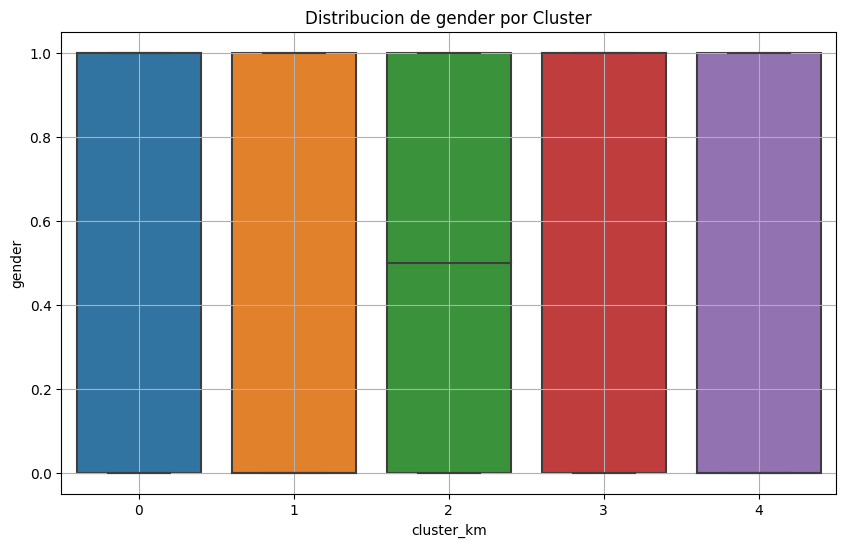

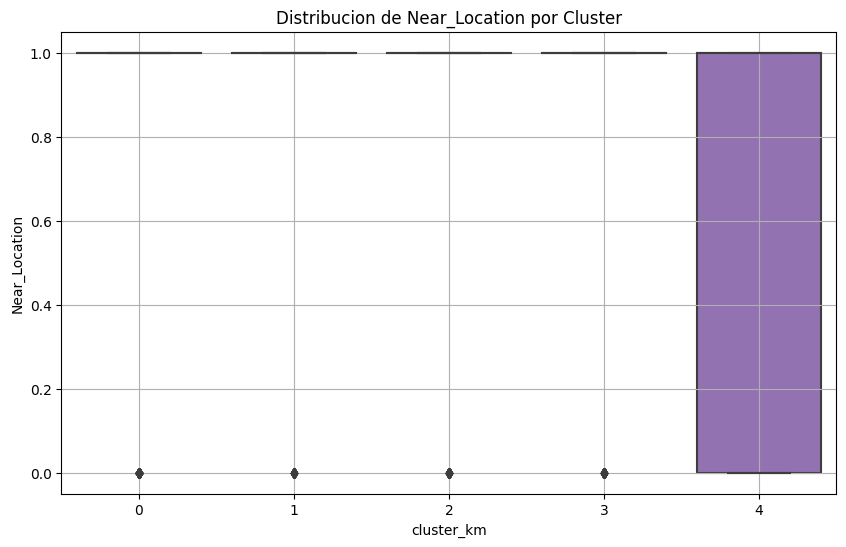

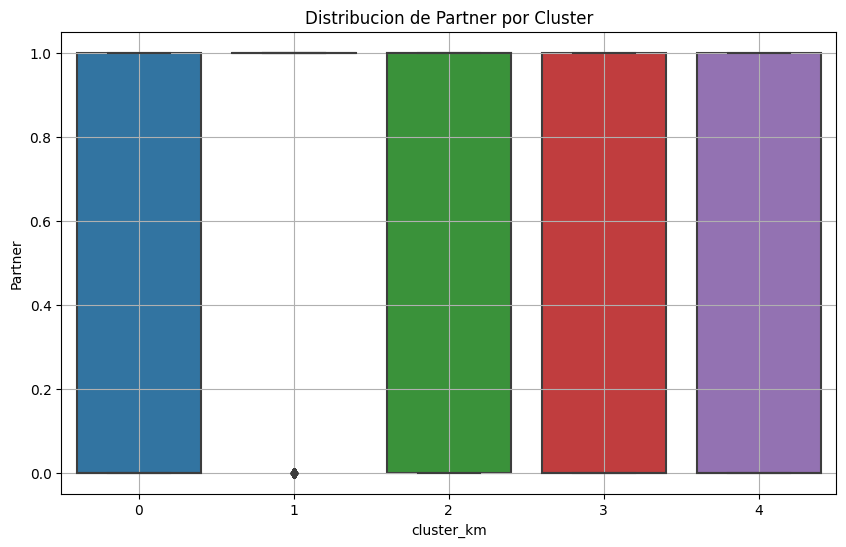

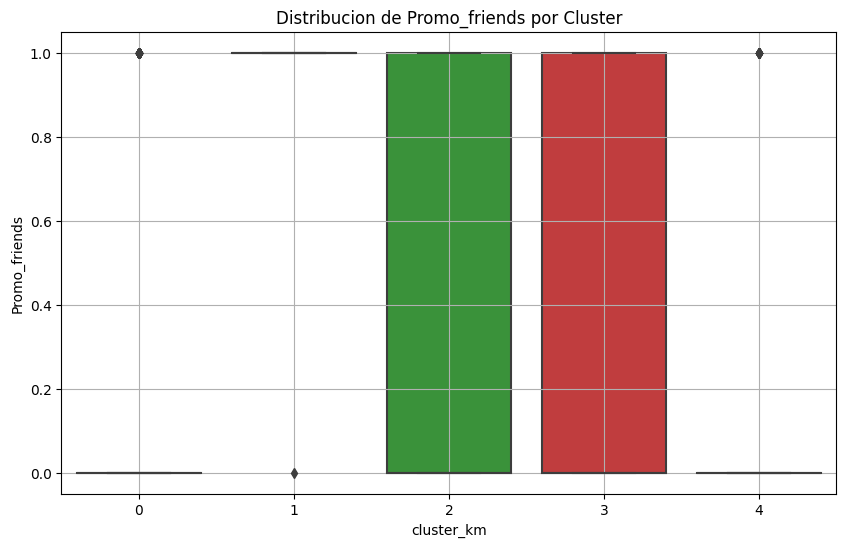

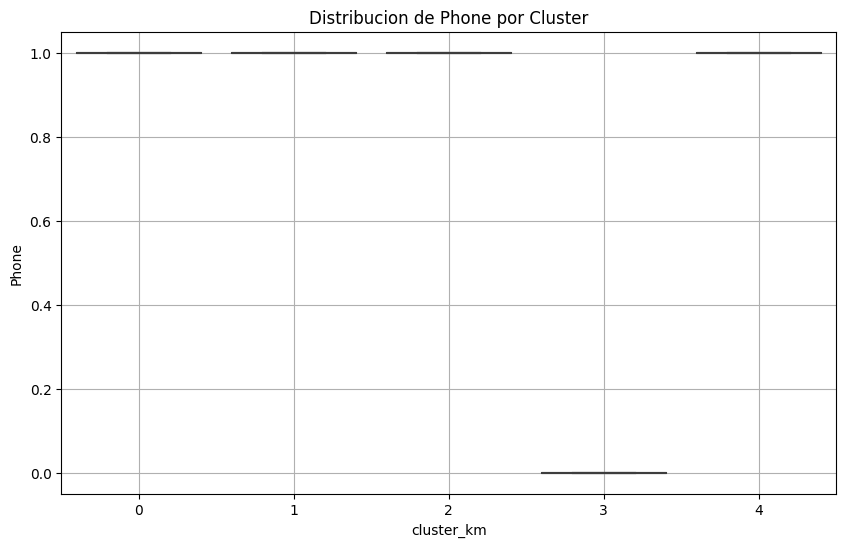

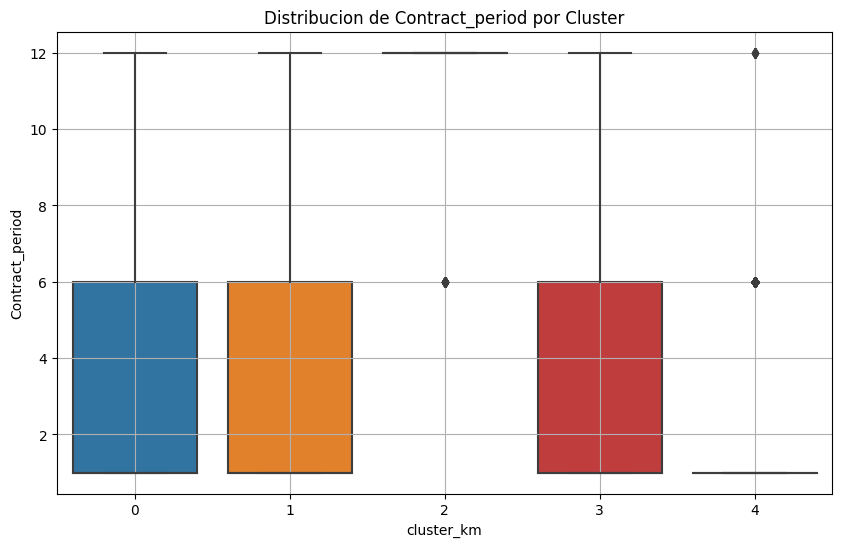

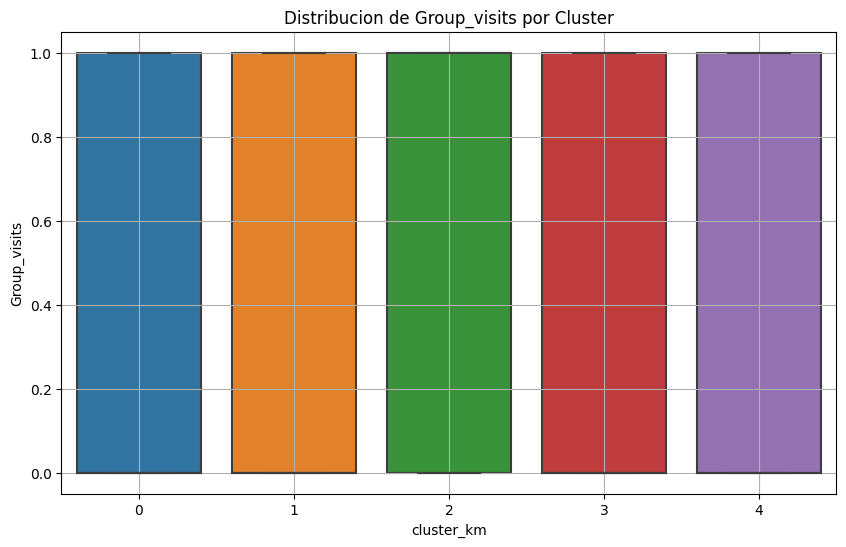

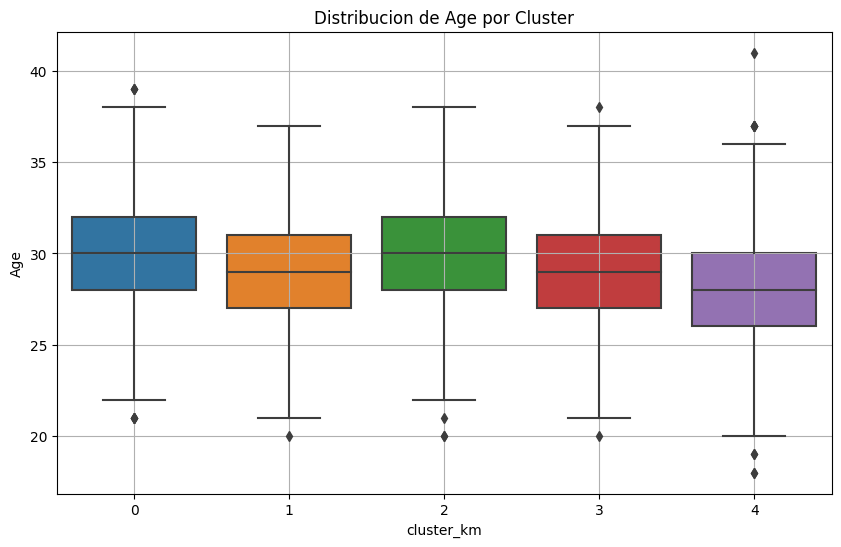

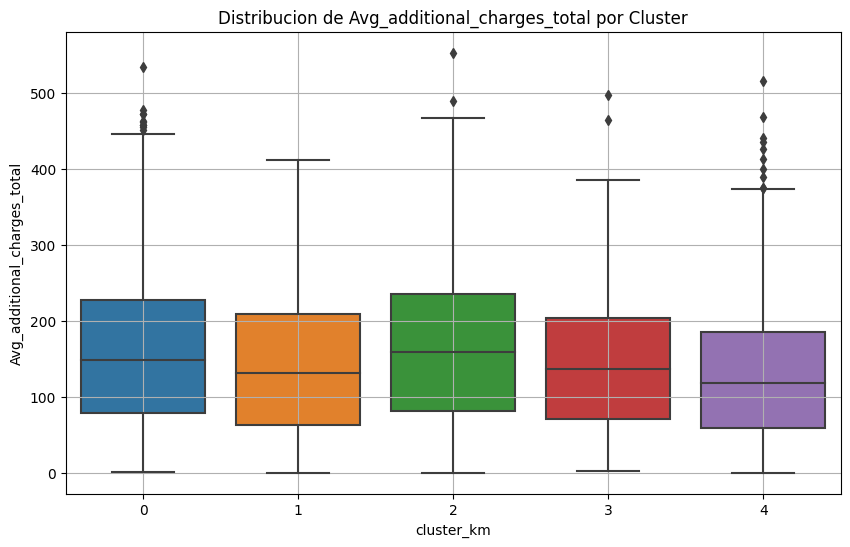

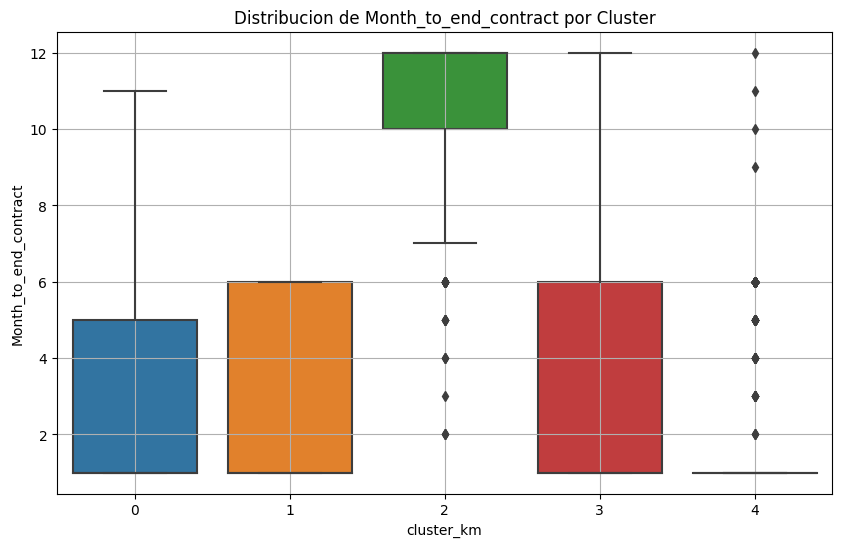

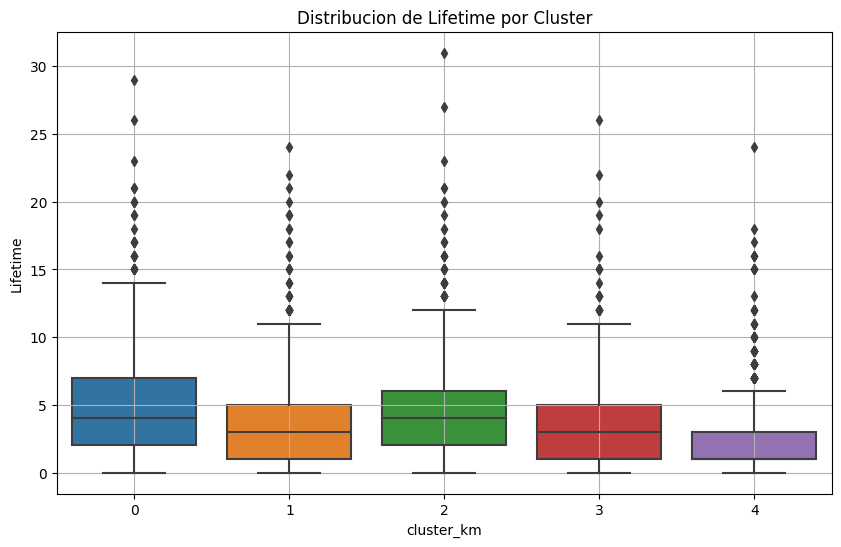

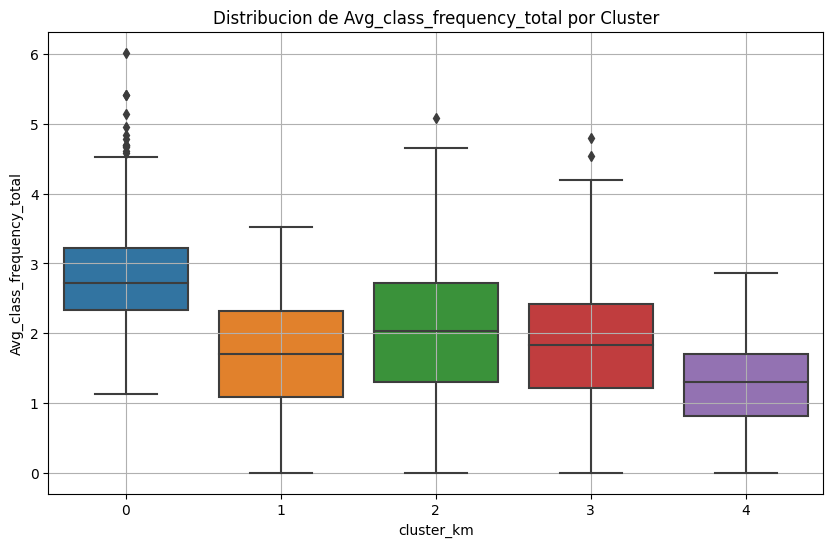

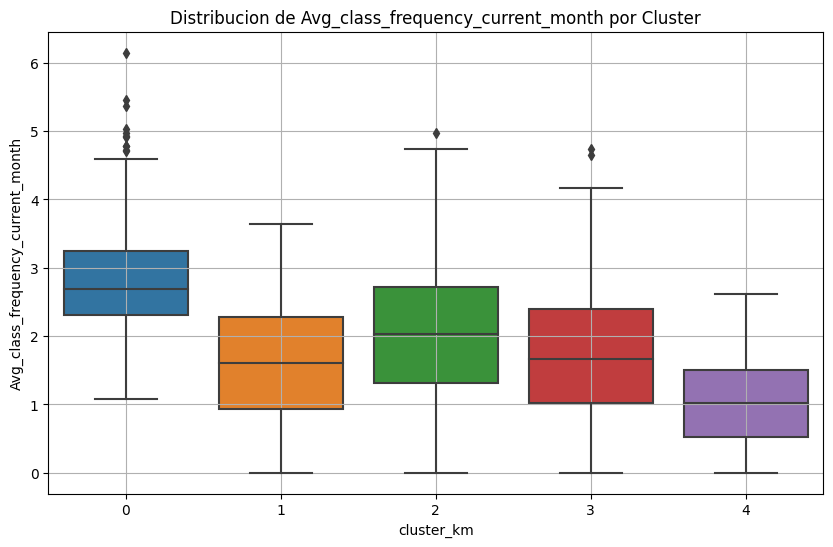

In [28]:
#Hacemos un bucle for para graficar cajas de bigotes de las caracteristicas y la variable cluster_km
features = X.columns
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster_km', y=feature, data=df_gym)
    plt.title(f'Distribucion de {feature} por Cluster')
    plt.grid()
    plt.show()

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen uso de los diagramas de caja para explorar las distribuciones de cada característica por clúster. La visualización permite detectar diferencias notables entre grupos y aporta claridad al análisis de segmentación.  
</div>


### 6. Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [29]:
tasa_cancelacion = df_gym.groupby('cluster_km')['Churn'].mean()
print(tasa_cancelacion)

cluster_km
0    0.079254
1    0.262058
2    0.021889
3    0.266839
4    0.559242
Name: Churn, dtype: float64


- Vemos que el cluster 4 tiene la mayor tasa de cancelacion, es donde se encuentra el grupo con menor edad, los que menos van en la semana, y los que no estan cerca del gym, tampoco estan afiliados a alguna empresa y no hace entrenamientos en equipo y solo contratan 1 mes de servicio 
- En Comparacion con el cluster 0 que son los usuarios con mayor edad en promedio de 30 años, estos son los que tienen mejor tiempo de vida, compran cosas adicionales y son en promedio los que mas veces van, el periodo de contrato promedio es de 12 meses. 

- Propensos a irse los del cluster 4
- Los leales son del cluster 0 

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente cierre de la parte de clustering, las gráficas refuerzan tu análisis previo y hacen más evidente la diferenciación entre los grupos de clientes. Una presentación clara y bien estructurada.  
</div>


## Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

- Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.
- No necesitas entrar en detalles. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.

- Para las conclusiones se observa que la mayoria que esta en el cluster 4 que son los mas propensos a irse y los del cluster 0 los de mayor lealtad podemos aplicar lo siguiente para mitigar la cancelacion del servicio:
1. Para el cluster 0 los catalogamos como los de mayor poder adquisitivo. Para ellos podemos.
   - Implementar un servicio premium o membresia, como acceso a clases personalizadas
   - Espacios exclusivos para hacer sus ejercicios.
   - Incluirle algunos productos con el pago de su menbresia.
3. Para el cluster 4 que son los de menor edad y que pudieran tener menor poder adquisitivo.
   - se le pueden hacer descuentos y promociones.
   - Otorgarle algun tipo de credito para que paguen a meses.
   - Que si no vive cerca de donde esta el gym obtenga algun descuento especial. 
   - Darle cupones por si vienen ciertos dias a la semana y con esto puedo adquirir algun producto de la tienda del gym.
     

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buenas conclusiones y recomendaciones estratégicas. Has logrado diferenciar acciones de retención específicas según el perfil de cada clúster, mostrando una visión práctica y enfocada en el cliente.  
</div>


## Comentario final del revisor 

# Comentario General del Revisor

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un excelente manejo de los datos, un análisis exploratorio sólido y la implementación de modelos predictivos y de segmentación de clientes con claridad.  

#### Puntos Positivos:

* **Procesamiento de datos:** Comprobaste la calidad de los datos y confirmaste la ausencia de valores nulos, generando una base confiable.
* **Visualización y análisis gráfico:** Los histogramas, diagramas de caja y mapas de calor reforzaron el entendimiento de patrones y diferencias clave.
* **Ingeniería de características y segmentación:** La aplicación de clustering permitió identificar perfiles de clientes relevantes, aportando valor estratégico.
* **Comparación de modelos:** Probaste distintos algoritmos, analizaste métricas y seleccionaste la mejor opción de forma justificada.

Tu trabajo combina rigor técnico con interpretaciones prácticas que pueden aplicarse en una estrategia real de retención y fidelización de clientes. Un resultado muy completo y bien estructurado.

</div>  
